In [ ]:
from tensorflow.python.client import  device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4228425304971775038
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16154099712
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7035271981838921872
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split, KFold
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization
from sklearn import metrics
from sklearn.metrics import classification_report
import time
from tqdm.notebook import tqdm
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import h5py

DATA_DIR = "/content/drive/MyDrive/data_224.mat"

data = h5py.File(DATA_DIR,'r')

data.keys()

<KeysViewHDF5 ['Img_Data_Res', 'Labels']>

In [ ]:
import numpy as np

X = np.transpose(np.array(data['Img_Data_Res']))
Y = np.reshape(np.array(data['Labels']),[-1,])

print(X.shape)
print(Y.shape)

(15534, 224, 224, 3)
(15534,)


In [ ]:
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.1)
#X = (X)/255
#X_test = (X_test)/255

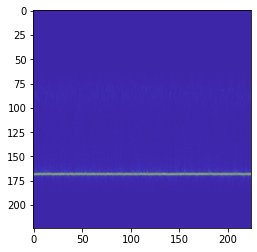

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X[0,:,:,:])

In [ ]:
X.shape

(13980, 224, 224, 3)

In [ ]:
num_classes = 15
filter_conv = (6,6)
pool = (4,4)
dropout_rate = 0.35
input_shape = (224,224,3)
train_accuracy_per_fold = []
test_accuracy_per_fold = []
kfold = KFold(n_splits = 10, shuffle=True)
fold = 1
for train, test in kfold.split(X,Y):
  model = Sequential()

  model.add(BatchNormalization(input_shape = input_shape))
  model.add(Conv2D(8, filter_conv, padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = pool, strides = None))

  model.add(Conv2D(16, filter_conv, padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = pool, strides = None))

  model.add(Conv2D(32, filter_conv, padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = pool, strides = None))
  model.add(Dropout(dropout_rate))
  model.add(Flatten())

  model.add(Dense(num_classes, activation = 'softmax'))

  model.build(input_shape)
  model.summary()

  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
  model.compile(
        optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]
  )

  # early_stopping_split = tf.keras.callbacks.EarlyStopping(
  #   monitor = "val_loss",
  #   patience = 20
  # )

  history = model.fit(X[train], Y[train], epochs = 50, batch_size=8, shuffle = True, validation_split = 0.1)
  test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 2)
  print("Test accuracy in fold {} : {}%".format(fold, test_acc*100))
  fold = fold+1
  test_accuracy_per_fold.append(test_acc*100)
print(f'> Overall Test Accuracy: {np.mean(test_accuracy_per_fold)} (+- {np.std(test_accuracy_per_fold)})')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 8)       872       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                        

In [ ]:
model.save('/content/drive/MyDrive/Documents/UAV_Final.h5')

Split

In [ ]:
num_classes = 15
filter_conv = (6,6)
pool = (4,4)
dropout_rate = 0.35
input_shape = (224,224,3)
model = Sequential()

model.add(BatchNormalization(input_shape = input_shape))
model.add(Conv2D(8, filter_conv, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool, strides = None))

model.add(Conv2D(16, filter_conv, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool, strides = None))

model.add(Conv2D(32, filter_conv, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool, strides = None))
model.add(Dropout(dropout_rate))
model.add(Flatten())

model.add(Dense(num_classes, activation = 'softmax'))

model.build(input_shape)
model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(
      optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]
)

# early_stopping_split = tf.keras.callbacks.EarlyStopping(
#   monitor = "val_loss",
#   patience = 20
# )

history = model.fit(X, Y, epochs = 50, batch_size=8, shuffle = True, validation_split = 0.1)
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 224, 224, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 8)       872       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                      

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


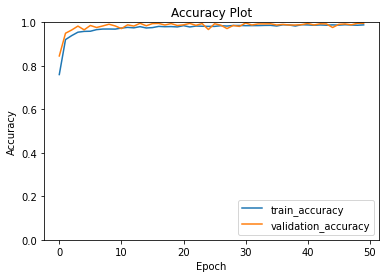

In [ ]:
plt.figure('Accuracy Plot')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Accuracy Plot')
plt.savefig('/content/drive/MyDrive/UAV_Project/Plots/Accuracy_Plot_Model.eps', format='eps')
plt.savefig('/content/drive/MyDrive/UAV_Project/Plots/Accuracy_Plot_Model.pdf', format='pdf')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


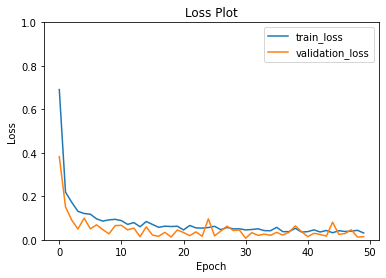

In [ ]:
plt.figure('Loss Plot')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.title('Loss Plot')
plt.savefig('/content/drive/MyDrive/UAV_Project/Plots/Loss_Plot_Model.eps', format='eps')
plt.savefig('/content/drive/MyDrive/UAV_Project/Plots/Loss_Plot_Model.pdf', format='pdf')

49/49 - 0s - loss: 0.0163 - accuracy: 0.9936 - 358ms/epoch - 7ms/step
test accuracy = 99.35649935649936 %

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        88
         1.0       1.00      1.00      1.00        92
         2.0       1.00      1.00      1.00       113
         3.0       1.00      0.99      0.99        89
         4.0       1.00      1.00      1.00        84
         5.0       1.00      1.00      1.00       109
         6.0       1.00      1.00      1.00       104
         7.0       0.99      0.95      0.97       140
         8.0       1.00      1.00      1.00       110
         9.0       0.98      1.00      0.99       104
        10.0       1.00      1.00      1.00       108
        11.0       1.00      0.99      0.99        96
        12.0       0.94      0.99      0.96       110
        13.0       1.00      1.00      1.00       100
        14.0       1.00      1.00      1.00       107

    accuracy               

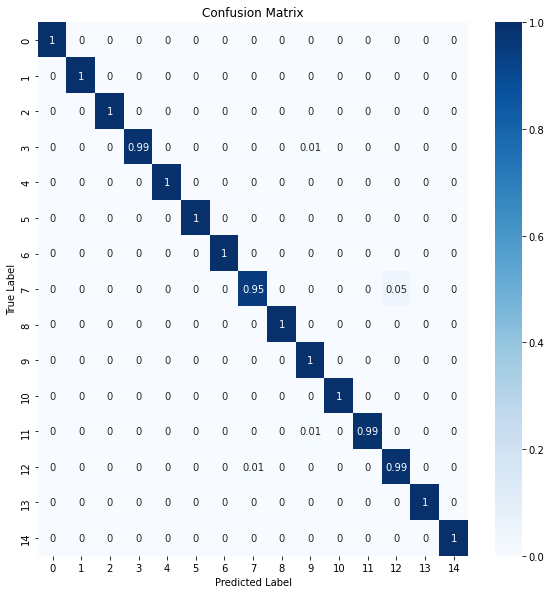

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
Y_te = np.array(tf.math.argmax(model.predict(X_test), 1))
cm = tf.math.confusion_matrix(Y_test, Y_te)


acc = metrics.accuracy_score(Y_test, Y_te)
print("test accuracy =", acc*100,"%\n")

print(classification_report(Y_test, Y_te))

con_mat = tf.math.confusion_matrix(labels=Y_test, predictions=Y_te).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14"]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)
plt.figure('Confusion Matrix',figsize=(6,8))
sns.heatmap(con_mat_df, annot=True, cmap="Blues")
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('True Label', fontsize=10)
plt.xlabel('Predicted Label', fontsize=10)
plt.savefig('/content/drive/MyDrive/UAV_Project/Plots/Confusion_Matrix_Model_1.eps', format='eps')
plt.savefig('/content/drive/MyDrive/UAV_Project/Plots/Confusion_Matrix_Model_1.pdf', format='pdf')
plt.savefig('/content/drive/MyDrive/UAV_Project/Plots/Confusion_Matrix_Model_1.png', format='png')

In [ ]:
model.save('/content/drive/MyDrive/UAV_Project/UAV_Model_Final.h5')

In [ ]:
pip install poof

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 280 kB 5.9 MB/s 
     |████████████████████████████████| 97 kB 7.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=5086f3bdbea84cac80ee25f7af8e4cfb06b6149d46c9ada682ab36da09b6a59b
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires 

In [ ]:
import poof

KeyError: ignored